In [1]:
import time
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import quandl
quandl.ApiConfig.api_key = 'JgrixskwB3MtGDkJtxms'
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Simple Rate of Return
# Beginning Price is Price at Purchase
# Ending Price is Price as Sale 
# Simple Rate of Return for a single stock = (Ending Price - Beginning Price)/(Beginning Price)
# With dividends it would be = ((Ending Price+Dividend) - Beginning Price)/(Beginning Price)

In [6]:
# Logarithmic Rate of Return = log(Ending Price/Beginning Price) = log(Ending) - log(Beginning)

In [9]:
# Which to choose: Simple or Log
# Simple Rate of Return is preferrable when dealing with multiple assets over the same time frame
# Logarithmis is preffrable when dealing with a single asset over time

In [11]:
# Keep in mind timeframe.
# You can calculate Rate of Return different than a year (ie: less. Daily, Monthly, Quarterly, Yearly)
# Investments with different holding periods should not be compared

In [12]:
# Annual Return = [(daily return + 1)**365]*100

In [15]:
# History vs Expected/Future Rates of Return
# History is Rate of Return can help us predict or build expectations about the future.

In [16]:
PG = wb.DataReader('PG',data_source='yahoo', start='1995-01-01')

In [17]:
PG.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-10-09,92.400002,92.620003,91.930000,92.120003,92.120003,5149000
2017-10-10,92.370003,93.040001,89.860001,91.620003,91.620003,17125600
2017-10-11,91.089996,91.730003,91.070000,91.459999,91.459999,7115400
2017-10-12,91.410004,92.309998,91.389999,92.150002,92.150002,5984900
2017-10-13,92.699997,93.510002,92.589996,93.040001,93.040001,6915200


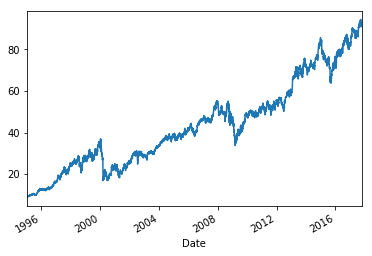

In [18]:
PG['Adj Close'].plot();

In [19]:
PG['Simple Rate Return'] = (PG['Adj Close']/PG['Adj Close'].shift(1))-1

In [30]:
PG.head()

,Open,High,Low,Close,Adj Close,Volume,Simple Rate Return
Date,,,,,,,
1995-01-03,15.46875,15.62500,15.43750,15.59375,9.027610,3318400,NaN
1995-01-04,15.53125,15.65625,15.31250,15.46875,8.955246,2218800,-0.008016
1995-01-05,15.37500,15.43750,15.21875,15.25000,8.828607,2319600,-0.014141
1995-01-06,15.15625,15.40625,15.15625,15.28125,8.846698,3438000,0.002049
1995-01-09,15.34375,15.40625,15.18750,15.21875,8.810512,1795200,-0.004090


In [20]:
PG['Simple Rate Return'].tail()

Date
2017-10-09   -0.002274
2017-10-10   -0.005428
2017-10-11   -0.001746
2017-10-12    0.007544
2017-10-13    0.009658
Name: Simple Rate Return, dtype: float64

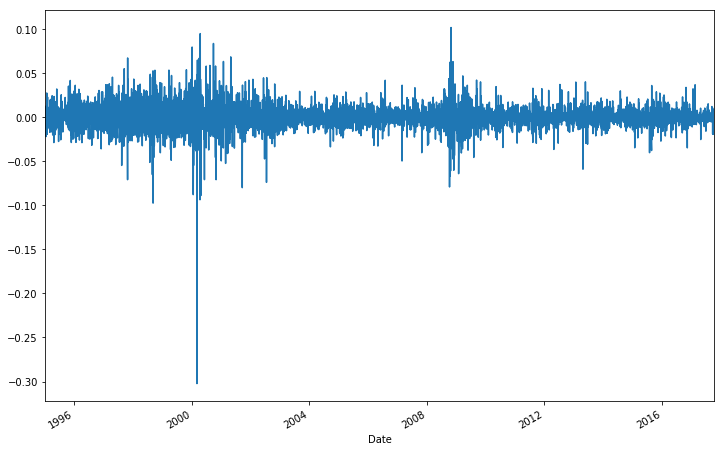

In [32]:
PG['Simple Rate Return'].plot(figsize=(12,8));

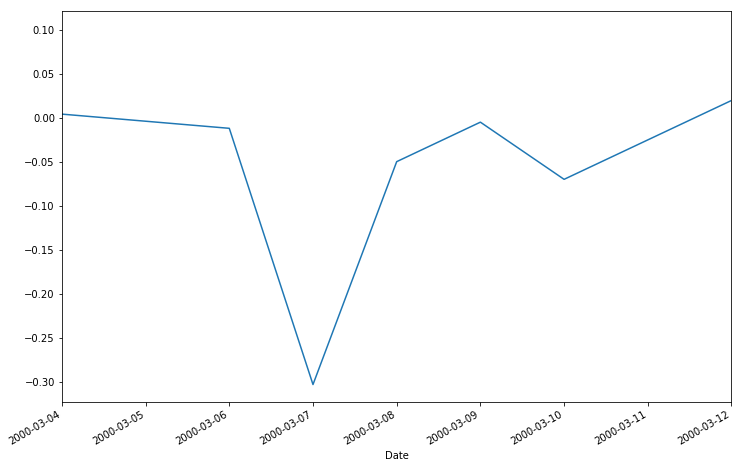

In [33]:
# http://money.cnn.com/2000/03/07/companies/procter/
# http://money.cnn.com/2000/03/07/markets/markets_newyork/
# http://www.chegg.com/homework-help/questions-and-answers/first-half-2000-procter-gamble-world-u2019s-largest-supplier-personal-household-products-f-q4079293
PG['Simple Rate Return'].plot(figsize=(12,8),xlim=['2000-03-04','2000-03-12']);

In [34]:
avg_daily_ret = PG['Simple Rate Return'].mean()

In [35]:
avg_daily_ret

0.0005085181649612359

In [36]:
avg_annual_ret = PG['Simple Rate Return'].mean() * 250 # 250 trading days

In [37]:
avg_annual_ret

0.12712954124030898

In [66]:
str(np.round(avg_annual_ret,5)*100) + '%'

'12.713%'

In [40]:
PG['Log Return'] = np.log(PG['Adj Close']/PG['Adj Close'].shift(1))

In [41]:
PG['Log Return'].head()

Date
1995-01-03         NaN
1995-01-04   -0.008048
1995-01-05   -0.014242
1995-01-06    0.002047
1995-01-09   -0.004099
Name: Log Return, dtype: float64

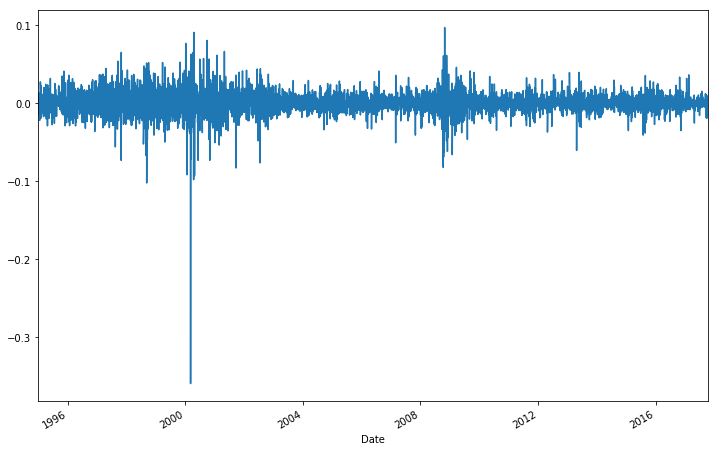

In [42]:
PG['Log Return'].plot(figsize=(12,8));

In [43]:
log_daily_ret = PG['Log Return'].mean()

In [44]:
log_daily_ret

0.0004066135366695018

In [45]:
log_annual_ret = PG['Log Return'].mean() * 250

In [46]:
log_annual_ret

0.10165338416737545

In [64]:
str( np.round(log_annual_ret,5) * 100) + '%'

'10.165%'